## Multi Plot Grid

### seaborn.pairplot
seaborn.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

It is also possible to show a subset of variables or plot different variables on the rows and columns.

This is a high-level interface for PairGrid that is intended to make it easy to draw a few common styles. You should use PairGrid directly if you need more flexibility.

Parameters
dataDataFrame
Tidy (long-form) dataframe where each column is a variable and each row is an observation.

huestring (variable name), optional
Variable in data to map plot aspects to different colors.

hue_orderlist of strings
Order for the levels of the hue variable in the palette

palettedict or seaborn color palette
Set of colors for mapping the hue variable. If a dict, keys should be values in the hue variable.

varslist of variable names, optional
Variables within data to use, otherwise use every column with a numeric datatype.

{x, y}_varslists of variable names, optional
Variables within data to use separately for the rows and columns of the figure; i.e. to make a non-square plot.

kind{‘scatter’, ‘reg’}, optional
Kind of plot for the non-identity relationships.

diag_kind{‘auto’, ‘hist’, ‘kde’, None}, optional
Kind of plot for the diagonal subplots. The default depends on whether "hue" is used or not.

markerssingle matplotlib marker code or list, optional
Either the marker to use for all datapoints or a list of markers with a length the same as the number of levels in the hue variable so that differently colored points will also have different scatterplot markers.

heightscalar, optional
Height (in inches) of each facet.

aspectscalar, optional
Aspect * height gives the width (in inches) of each facet.

cornerbool, optional
If True, don’t add axes to the upper (off-diagonal) triangle of the grid, making this a “corner” plot.

dropnaboolean, optional
Drop missing values from the data before plotting.

{plot, diag, grid}_kwsdicts, optional
Dictionaries of keyword arguments. plot_kws are passed to the bivariate plotting function, diag_kws are passed to the univariate plotting function, and grid_kws are passed to the PairGrid constructor.

Returns
gridPairGrid
Returns the underlying PairGrid instance for further tweaking.

Examples

Draw scatterplots for joint relationships and histograms for univariate distributions:

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', color_codes=True)
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


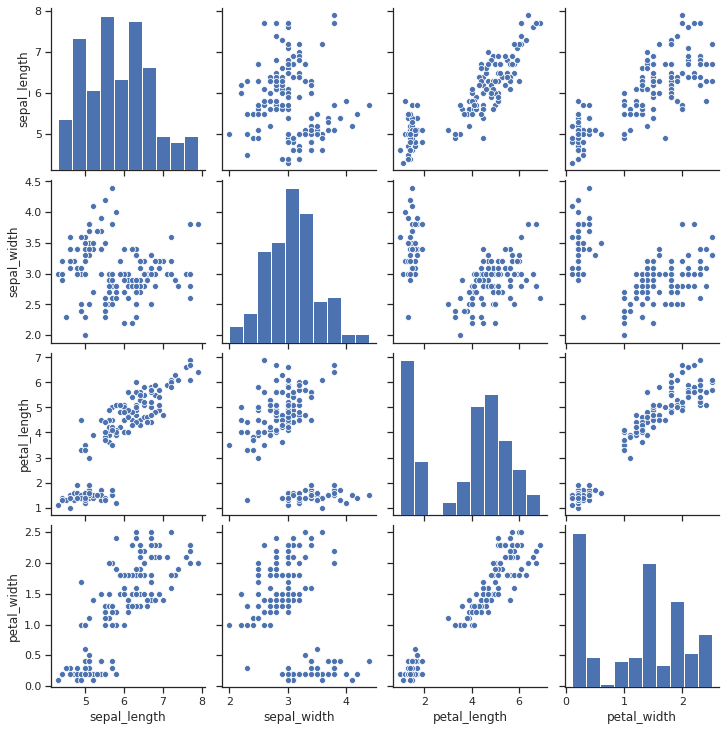

In [6]:
g = sns.pairplot(data=iris)


Show different levels of a categorical variable by the color of plot elements:

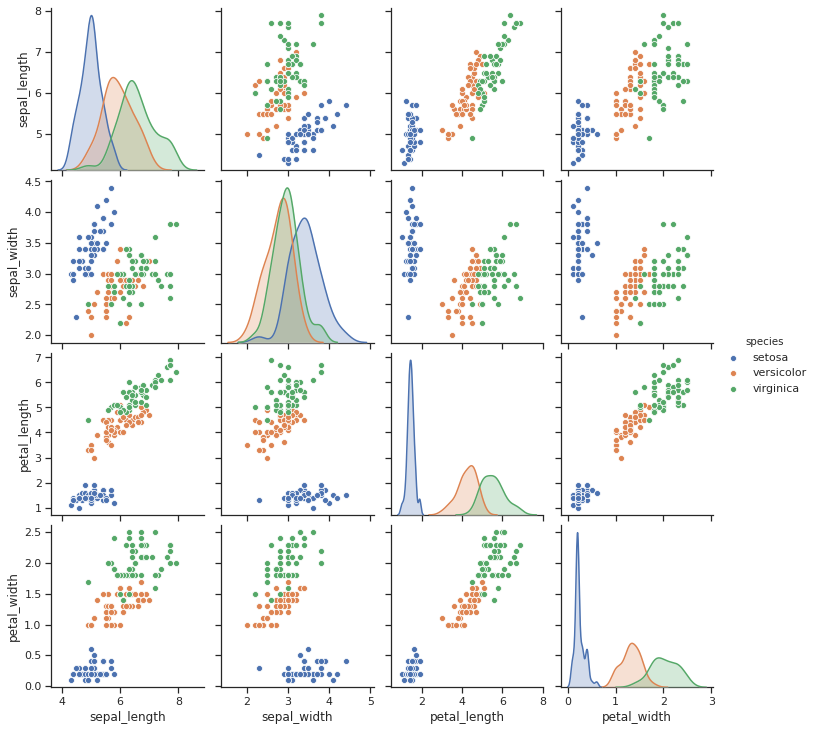

In [7]:
g = sns.pairplot(data=iris, hue='species')

Use a different color palette:

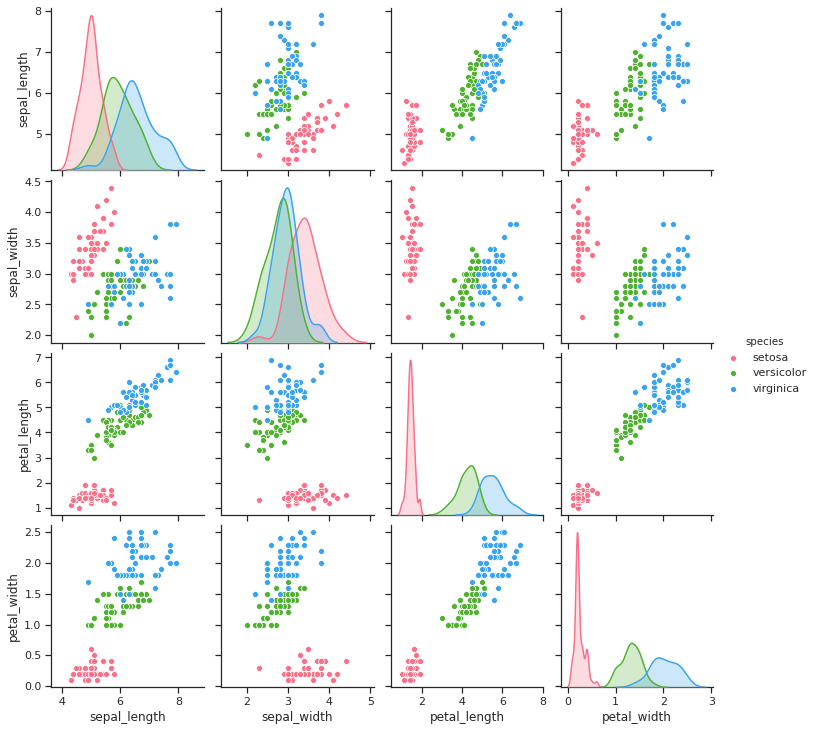

In [11]:
g = sns.pairplot(data=iris, hue='species', palette='husl')

Use different markers for each level of the hue variable:

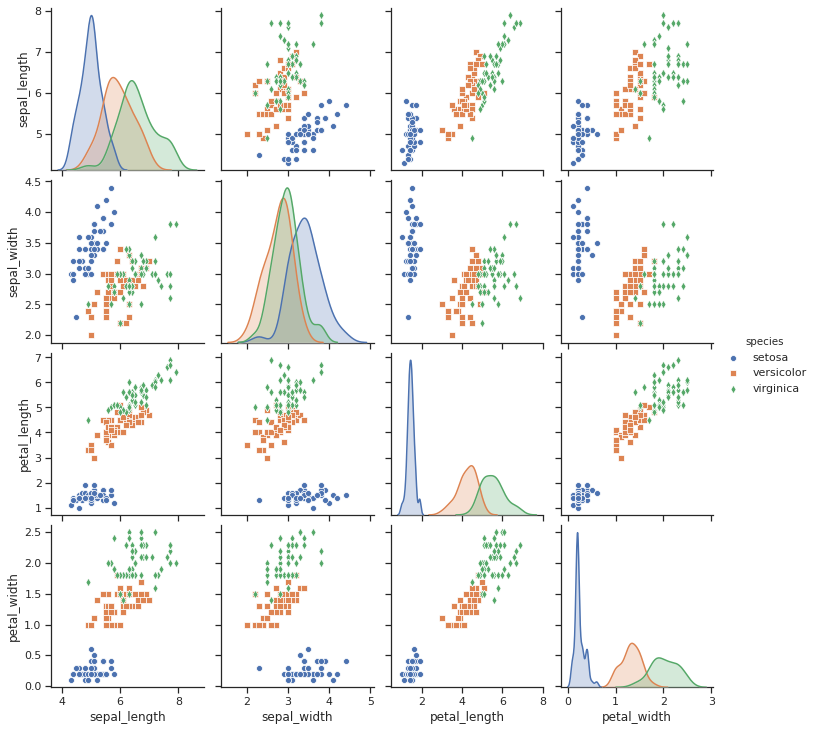

In [13]:
g = sns.pairplot(data=iris, hue='species', markers=['o','s','d'])

Plot a subset of variables:

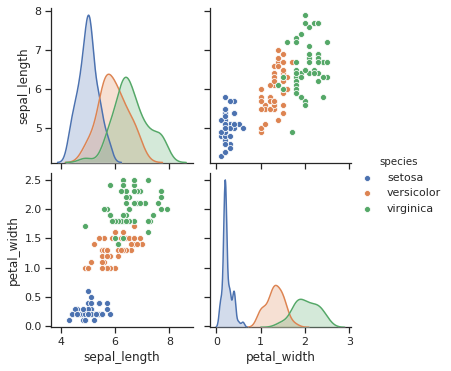

In [16]:
g = sns.pairplot(data=iris, hue='species', vars=['sepal_length', 'petal_width'])

Draw larger plots:

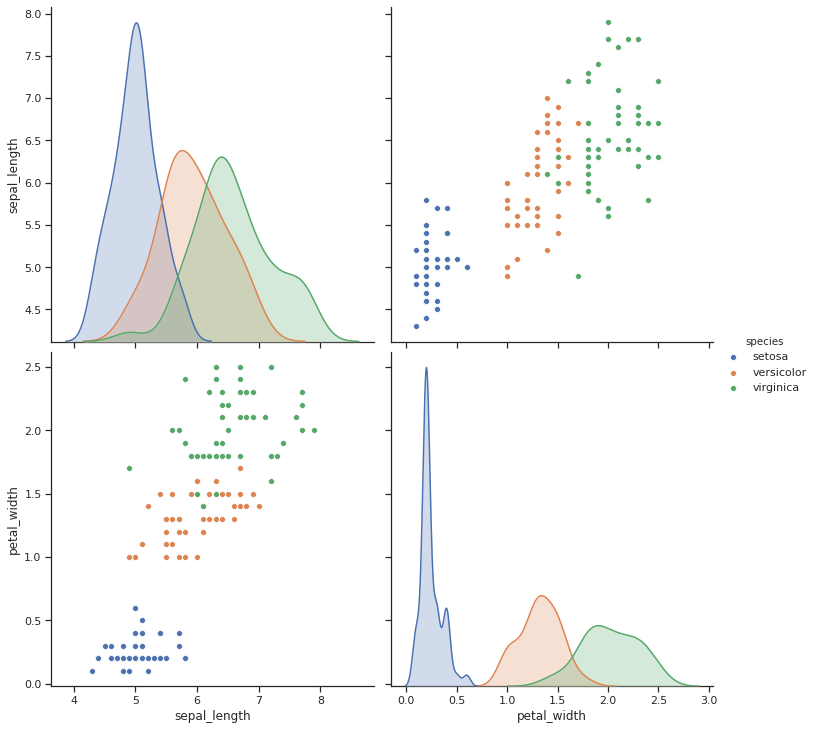

In [17]:
g = sns.pairplot(data=iris, hue='species', vars=['sepal_length', 'petal_width'], height=5)

Plot different variables in the rows and columns:

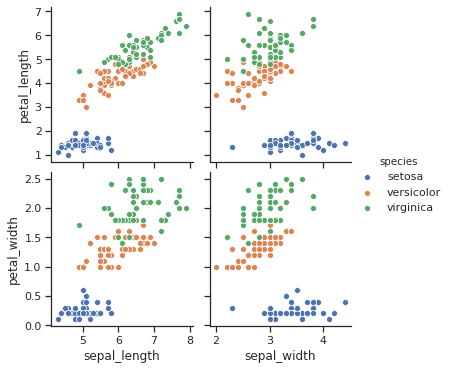

In [18]:
g = sns.pairplot(data=iris, x_vars=['sepal_length', 'sepal_width']
                ,y_vars=['petal_length','petal_width'], hue='species')

Plot only the lower triangle of bivariate axes:

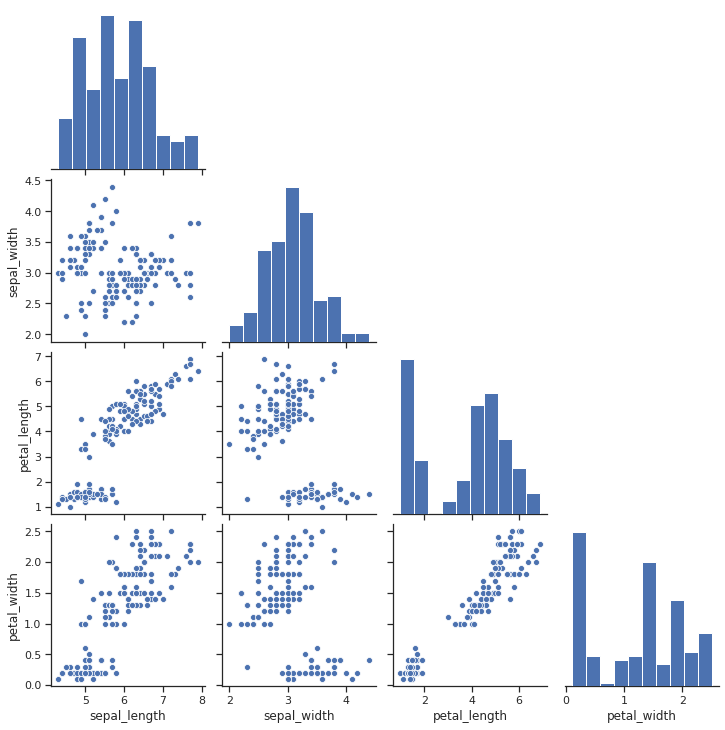

In [19]:
sns.pairplot(data=iris, corner=True)

Use kernel density estimates for univariate plots:

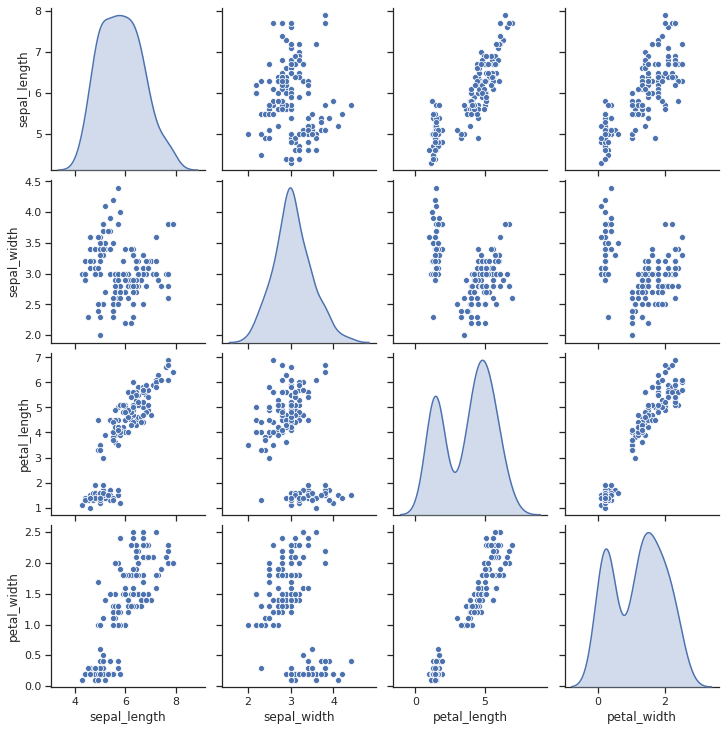

In [22]:
sns.pairplot(data=iris, diag_kind='kde')

Fit linear regression models to the scatter plots:

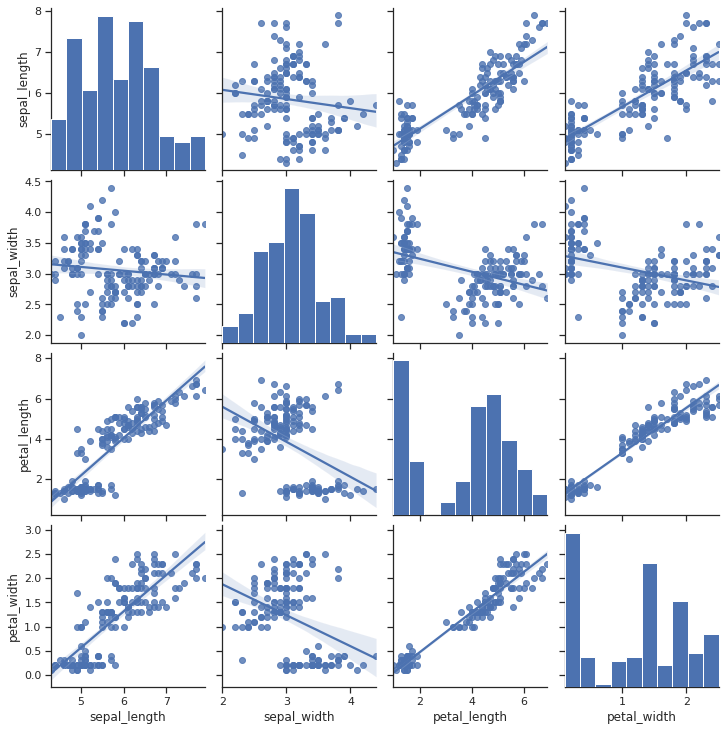

In [23]:
sns.pairplot(data=iris, kind='reg')

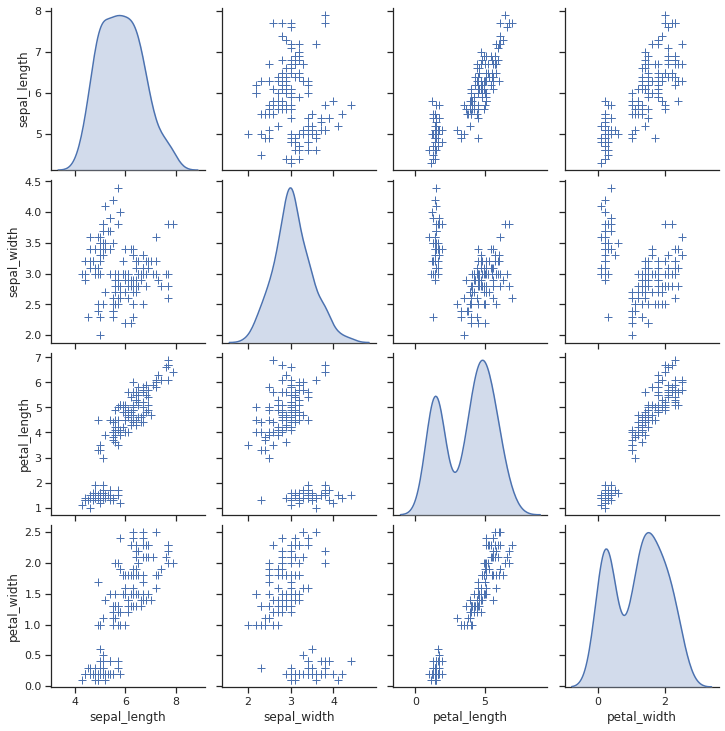

In [24]:
# Pass keyword arguments down to the underlying functions (it may be easier to use PairGrid directly):

g = sns.pairplot(iris, diag_kind="kde", markers="+",
                 plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                 diag_kws=dict(shade=True))